KNN실습

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2)

knn_clf=KNeighborsClassifier() #디폴트 k는 5개
knn_clf.fit(X_train,y_train)

pred=knn_clf.predict(X_test)
(pred==y_test).mean()

0.9666666666666667

In [13]:
train_acc_list=[]
test_acc_list=[]
for i in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=i) #i=k개수
    knn.fit(X_train,y_train)
    
    train_pred=knn.predict(X_train)
    train_acc=(train_pred == y_train).mean() #맞춘 모든 경우를 합해서 평균을 내줌
    train_acc_list.append(train_acc)
    
    test_pred = knn.predict(X_test)
    test_acc = (test_pred == y_test).mean()
    test_acc_list.append(test_acc)

In [14]:
test_acc_list #각 k개마다 나오는 accuracy 값을 list에 append해서 그중 best를 찾기 위함

[0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.8666666666666667,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8666666666666667,
 0.9,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666

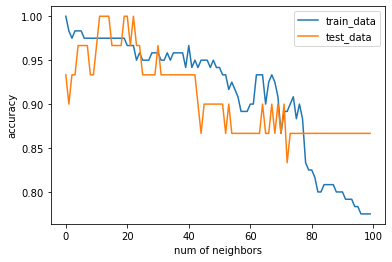

In [15]:
iter_range=range(100)
plt.plot(iter_range, train_acc_list, label='train_data')
plt.plot(iter_range, test_acc_list, label='test_data')
plt.xlabel("num of neighbors")
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show();

In [16]:
np.argmax(test_acc_list) #11번째일때 k가 제일 좋다

11

churn(가입자 이탈률) 실습

In [3]:
import pandas as pd
import seaborn as sns

In [35]:
df=pd.read_csv("churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
pd.set_option('display.max_columns',30) #생략된 컬럼없이 30개까지 보겠다
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
#knn하기 위해 먼저 결측치 있는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
#object인 total charge를 숫자float64로 바꿔야함
#to_numeric; 숫자로 바꿔주기
df['TotalCharges'] = df['TotalCharges'].replace(" ","") #나에게 보이지 않는 공백 삭제
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


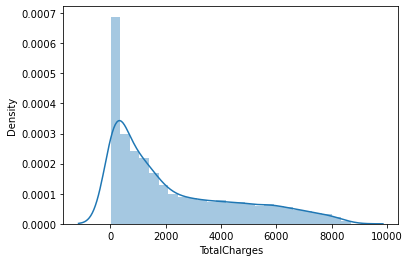

In [40]:
sns.distplot(df['TotalCharges']);

In [41]:
df['PhoneService'].dtype #분석할 때 문자열을 숫자로 바꿔줘야 연산 가능; 현재 object;문자열

dtype('O')

In [42]:
#문자열인 컬럼 뽑아내기; 문자열 바꿔주기 위해 어떤 열이 문자열인지 확인
col_list=[]
for c in df.columns:
    if df[c].dtype == 'O':
        col_list.append(c)

col_list

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [43]:
for column_name in col_list:
    print(column_name, df[column_name].nunique()) #nunique;고유값 개수 세기
#종류 두개인 경우: 0 1
#종류 세개인 경우: 0 1 2는 안됨; 순위로 생각 => 100 010 001으로 나타냄; One hot encoding한개만 표현
#Electronic쓰는 경우: 100
#행 하나를 삭제해도 됨; 맨 앞열 삭제하면 00 10 01

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


In [44]:
#One hot encoding 만들어주는 get_dummies
#tenure; 고객이 자사 서비스 이용한 개월 수
#스케일링 필요: 표준화, 정규화 ~~가장 작은 값은 0, 가장 큰 값은 1로 만들어주기
col_list=col_list[1:] #col_list의 고객ID는 다 고유값이므로 필요x
df=pd.get_dummies(df, columns=col_list,drop_first=True) #drop_first; 첫번째 열을 없애는 옵션
df
#gender_Male; Female은 drop해도 됨

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,2234-XADUH,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [45]:
df.info() #uint8; unsigned int; 범주형이므로 양수,데이터 사이즈 작아도 됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [46]:
#null 값 확인; " "
df.isna().sum()

customerID                                0
SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [47]:
#결측값을 중앙값으로 대체
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isna().sum()

customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [48]:
#data 만들기
X=df.drop(['customerID','Churn_Yes'],axis=1)
y=df['Churn_Yes']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

test_acc_list=[]
for i in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=i) #i=k개수
    knn.fit(X_train,y_train)

    test_pred = knn.predict(X_test)
    test_acc = (test_pred == y_test).mean() #테스트의 정확도 평균(bool type 평균)
    test_acc_list.append(test_acc)

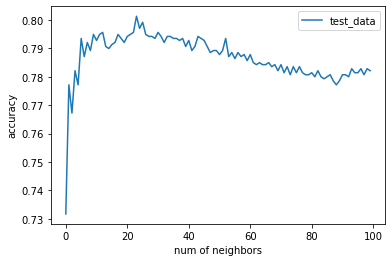

In [49]:
iter_range=range(100)
plt.plot(iter_range, test_acc_list, label='test_data')
plt.xlabel("num of neighbors")
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show();

In [50]:
np.argmax(test_acc_list) #주어진 numpy 배열에서 가장 높은 값 가진 값의 인덱스 반환

23

In [51]:
#가장 높은 정확도 출력//np.argmax에서 출력한게 인덱스 값이므로 +1해줘야 함
test_acc_list[24]

0.7970191625266146

In [52]:
#오차행렬 출력
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
confusion_matrix(y_test,pred)

array([[960,  76],
       [212, 161]], dtype=int64)

In [53]:
#성능평가지표 알 수 있음; 주로 F1 값 사용
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
#이탈yes의 f1-score=0.53이므로 성능 좋지 않음

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.68      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [54]:
#스케일링
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()

In [55]:
df.info() #스케일링 위해 ID는 없어야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [56]:
df.drop('customerID',axis=1,inplace=True) #이제 ID 안쓸거니까 그냥 drop

In [57]:
#train은 이렇게 하고, test는 fit만 하고 transform하지 말기!
mm_scaler.fit(df)
scaled_df=mm_scaler.transform(df) #이미 훈련된 거에 df값 집어넣음
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df #0에서 1값으로 줄인 것

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0.0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


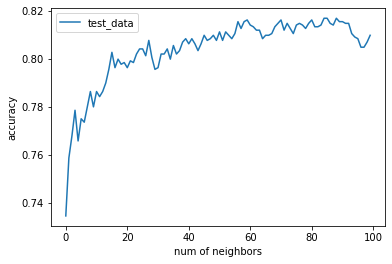

In [58]:
#바뀐 df로 셋 나누고 knn 진행; model은 스케일된 데이터로 학습
#train과 test data 따로 있는 경우, train 스케일링했다면 test도 따로 fit해줘야 함
X=scaled_df.drop('Churn_Yes',axis=1)
y=scaled_df['Churn_Yes']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

test_acc_list=[]
for i in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=i) #i=k개수
    knn.fit(X_train,y_train)

    test_pred = knn.predict(X_test)
    test_acc = (test_pred == y_test).mean()
    test_acc_list.append(test_acc)

iter_range=range(100)
plt.plot(iter_range, test_acc_list, label='test_data')
plt.xlabel("num of neighbors")
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show();

In [59]:
np.argmax(test_acc_list)

84

In [60]:
test_acc_list[85]

0.8168914123491838

In [61]:
knn=KNeighborsClassifier(n_neighbors=84)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
confusion_matrix(y_test,pred)

array([[920, 116],
       [146, 227]], dtype=int64)

In [62]:
print(classification_report(y_test,pred)) #스케일링하니까 0.63으로 f1 올라감

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      1036
         1.0       0.66      0.61      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409



유방암 환자

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier #Regressor는 수치 값; mse로 할 때
#linearregressor와 decisiontreeregressor 성능 비교 해보기

In [5]:
breast=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(breast.data, breast.target, test_size=0.2, random_state=42)
breast.target_names
#malignant;악성종양, benign;양성종양

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
df=pd.DataFrame(X_train,columns=breast.feature_names)
df['benign']=y_train #악성인지 양성인지 판단하는 라벨
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
451,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
452,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
453,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


In [8]:
train_gini, test_gini=[],[]
for i in range(1,16): #range는 임의로
    dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=i) #max_depth로 지니지수 성능 파악
    dt_gini.fit(X_train,y_train)
    
    train_acc = dt_gini.score(X_train,y_train) #score; predict도 하고 mean accuracy도 구해줌
    train_gini.append(train_acc)
    test_acc=dt_gini.score(X_test,y_test) #score는 mean accuracy 반환
    test_gini.append(test_acc)

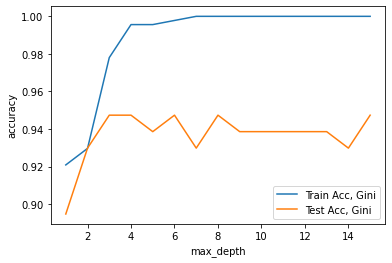

In [9]:
iter_ranges=np.linspace(1,15,num=15)
plt.plot(iter_ranges, train_gini,label="Train Acc, Gini")
plt.plot(iter_ranges, test_gini,label="Test Acc, Gini")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc='best') #범례. 위치는 알아서
plt.show();
#train은 이미 본 거니까 확률 높을 수 밖에
#score는 accuracy구하는 것

In [10]:
!pip install graphviz

In [12]:
np.argmax(test_gini)

2

In [13]:
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(646.7727272727273, 498.3, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(380.45454545454544, 407.70000000000005, 'worst radius <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(253.63636363636363, 317.1, 'radius error <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(152.1818181818182, 226.5, 'worst smoothness <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(101.45454545454545, 135.89999999999998, 'smoothness error <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(50.72727272727273, 45.299999999999955, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(152.1818181818182, 45.299999999999955, 'gini = 0.008\nsamples = 252\nvalue = [1, 251]'),
 Text(202.9090909090909, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(355.09090909090907, 226.5, 'mean concavity <= 0.029\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(304.3636363636364, 135.89999999999998, 'gin

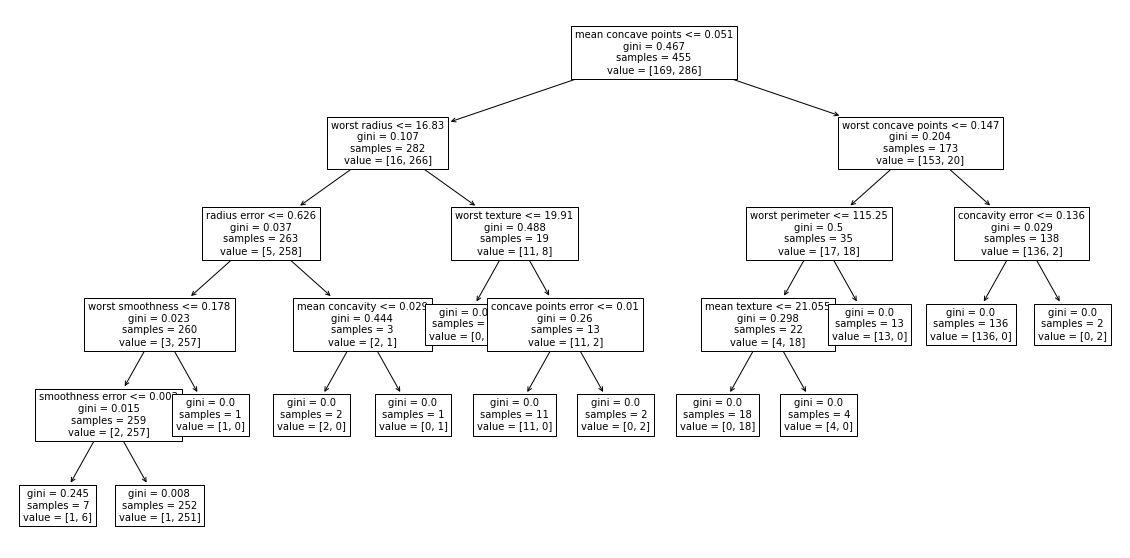

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_gini,feature_names=breast.feature_names,fontsize=10)

In [15]:
#graphviz 설치
from sklearn.tree import export_graphviz
export_graphviz(dt_gini, out_file='tree.dot',class_names=breast.target_names, feature_names=breast.feature_names,impurity=True,filled=True)

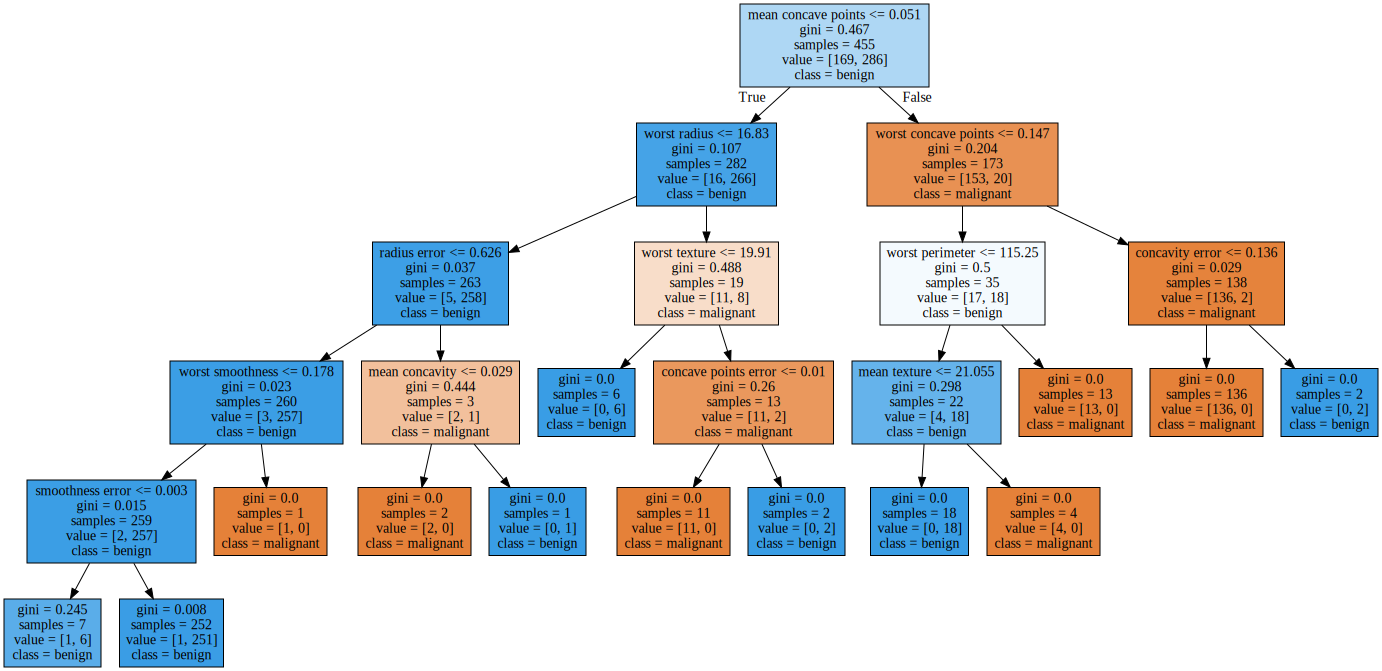

In [16]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)
#feature를 여러 갈래로 나눔

In [17]:
import seaborn as sns
import numpy as np
print("Feature importances: \n{}".format(np.round(dt_gini.feature_importances_,3)))

Feature importances: 
[0.    0.031 0.    0.    0.    0.    0.006 0.704 0.    0.    0.012 0.
 0.    0.    0.001 0.    0.019 0.016 0.    0.    0.053 0.028 0.052 0.
 0.009 0.    0.    0.067 0.    0.   ]


mean radius : 0.000
mean texture : 0.031
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.006
mean concave points : 0.704
mean symmetry : 0.000
mean fractal dimension : 0.000
radius error : 0.012
texture error : 0.000
perimeter error : 0.000
area error : 0.000
smoothness error : 0.001
compactness error : 0.000
concavity error : 0.019
concave points error : 0.016
symmetry error : 0.000
fractal dimension error : 0.000
worst radius : 0.053
worst texture : 0.028
worst perimeter : 0.052
worst area : 0.000
worst smoothness : 0.009
worst compactness : 0.000
worst concavity : 0.000
worst concave points : 0.067
worst symmetry : 0.000
worst fractal dimension : 0.000


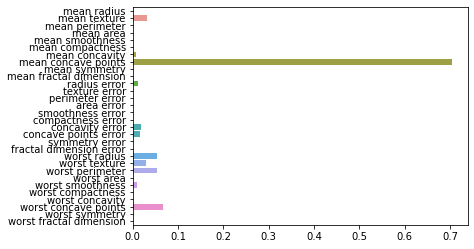

In [20]:
#중요한 feature 볼 수 있음
for name,value in zip(breast.feature_names,dt_gini.feature_importances_):
    print("{} : {:.3f}".format(name,value))
sns.barplot(x=dt_gini.feature_importances_,y=breast.feature_names);

<0114오후 todo>
1. 위 그래프 sorting 하기
2. dacon에 DecisionTreeRegressor 적용
3. entropy 적용하기
4. metrics - confusion, f1-score, recall, precision 확인

1.위 그래프 sorting 하기

In [21]:
import pandas as pd

<AxesSubplot:xlabel='0'>

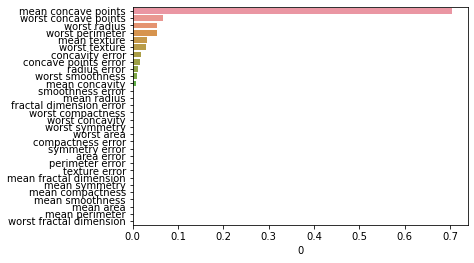

In [41]:
#matplot은 series 인식 x
df_gini=pd.DataFrame(dt_gini.feature_importances_,index=breast.feature_names,)
df_gini.sort_values(by=0, ascending=False, inplace=True)

sns.barplot(x=df_gini[0], y=df_gini.index)

3. entropy 적용하기

In [43]:
train_entropy, test_entropy=[],[]
for i in range(1,16): #range는 임의로
    dt_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=i) #max_depth로 지니지수 성능 파악
    dt_entropy.fit(X_train,y_train)
    
    train_acc = dt_entropy.score(X_train,y_train) #score; predict도 하고 mean accuracy도 구해줌
    train_entropy.append(train_acc)
    test_acc=dt_entropy.score(X_test,y_test) #score는 mean accuracy 반환
    test_entropy.append(test_acc)

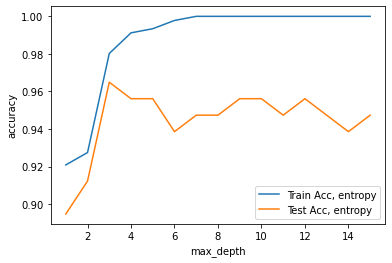

In [44]:
iter_ranges=np.linspace(1,15,num=15)
plt.plot(iter_ranges, train_entropy,label="Train Acc, entropy")
plt.plot(iter_ranges, test_entropy,label="Test Acc, entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc='best') #범례. 위치는 알아서
plt.show();

In [45]:
np.argmax(test_entropy) #그림이 1부터 시작

2

In [47]:
#gini일때 pred와 엔트로피일때의 pred 구하기
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
dt_gini.fit(X_train,y_train)
pred_gini = dt_gini.predict(X_test)

dt_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_entropy.fit(X_train,y_train)
pred_entropy = dt_entropy.predict(X_test)

4.metrics - confusion, f1-score, recall, precision 확인

In [48]:
from sklearn.metrics import classification_report

print("criterion : gini")
print(classification_report(y_test,pred_gini))
print("\n\ncriterion : entropy")
print(classification_report(y_test,pred_entropy))

criterion : gini
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



criterion : entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

